In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/MUFG2023"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")
OOF_DIR = os.path.join(OUTPUT_DIR, 'oof')

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import mean_squared_error,  mean_absolute_percentage_error
from sklearn.metrics import f1_score, accuracy_score

In [4]:
oof_lgbm = pd.read_csv(os.path.join(OOF_DIR,f"oof_lightgbm_ver6.csv"))
oof_ctb = pd.read_csv(os.path.join(OOF_DIR,f"oof_catboost_ver4.csv"))

In [5]:
oof_pred = oof_lgbm["pred"]*.2 + oof_ctb["pred"]*.8

In [6]:
best_score = 0
best_thresh = 0.5
for thresh in np.arange(0.15, 0.801, 0.01):
    thresh = np.round(thresh, 2)
    score = f1_score(oof_lgbm["is_fraud?"], (oof_pred>thresh).astype(int))
    print("F1 score at threshold {0} is {1}".format(thresh, score))
    if score > best_score:
      best_score = score
      best_thresh = thresh
print()
print("best F1 score at threshold {0} is {1}".format(best_thresh, f1_score(oof_ctb["is_fraud?"], (oof_pred>best_thresh).astype(int))))

F1 score at threshold 0.15 is 0.6256966492703067
F1 score at threshold 0.16 is 0.6329453144627752
F1 score at threshold 0.17 is 0.6390016667378947
F1 score at threshold 0.18 is 0.6438395914340433
F1 score at threshold 0.19 is 0.648084961817403
F1 score at threshold 0.2 is 0.6521856692203696
F1 score at threshold 0.21 is 0.6554803706413069
F1 score at threshold 0.22 is 0.6580350107380684
F1 score at threshold 0.23 is 0.6607922620631367
F1 score at threshold 0.24 is 0.6633092613708349
F1 score at threshold 0.25 is 0.6650011210403255
F1 score at threshold 0.26 is 0.6660299164670078
F1 score at threshold 0.27 is 0.6675820583235256
F1 score at threshold 0.28 is 0.6682401095908499
F1 score at threshold 0.29 is 0.6686979686979687
F1 score at threshold 0.3 is 0.6696229108927522
F1 score at threshold 0.31 is 0.6701100762066047
F1 score at threshold 0.32 is 0.6695339033672963
F1 score at threshold 0.33 is 0.6690741505021323
F1 score at threshold 0.34 is 0.6688592695170503
F1 score at threshold 0

In [7]:
pred_lgbm = pd.read_csv(os.path.join(OUTPUT_DIR,f"submit_lightgbm_ver6.csv"),header=None)
pred_ctb = pd.read_csv(os.path.join(OUTPUT_DIR,f"submit_catboost_ver4.csv"),header=None)

,0,1
0,471283,0
1,471284,0
2,471285,0
3,471286,1
4,471287,0


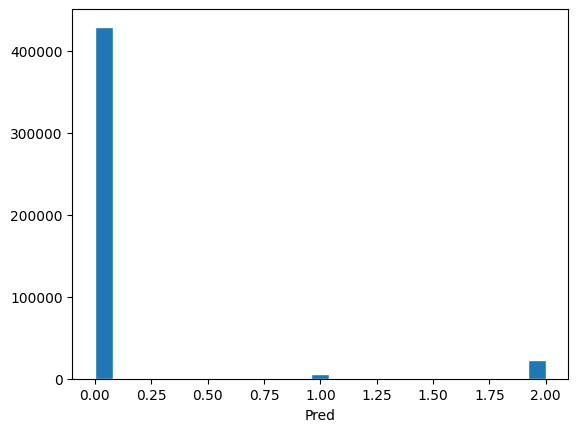

,0,1
0,471283,0
1,471284,0
2,471285,0
3,471286,1
4,471287,0
...,...,...
457953,929236,0
457954,929237,0
457955,929238,0
457956,929239,0


In [8]:
submit = pd.read_csv(os.path.join(INPUT_DIR,"sample_submit.csv"), header=None)
pred = pred_lgbm[1] + pred_ctb[1]
submit[1] = (pred>0).astype(int)

submit.to_csv(os.path.join(OUTPUT_DIR, f'submit_ensemble_ver7.csv'), index=False, header=None)
display(submit.head())

plt.hist(pred,bins=25,edgecolor='white')
plt.xlabel("Pred")
plt.show()

display(submit)

,0,1
0,471283,0
1,471284,0
2,471285,0
3,471286,1
4,471287,0


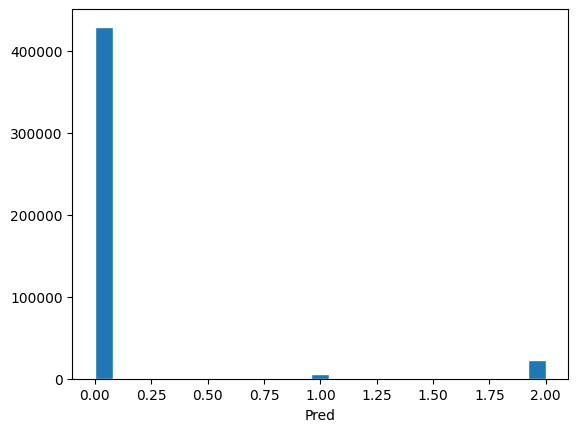

,0,1
0,471283,0
1,471284,0
2,471285,0
3,471286,1
4,471287,0
...,...,...
457953,929236,0
457954,929237,0
457955,929238,0
457956,929239,0


In [9]:
submit = pd.read_csv(os.path.join(INPUT_DIR,"sample_submit.csv"), header=None)
pred = pred_lgbm[1] + pred_ctb[1]
submit[1] = (pred>1).astype(int)

submit.to_csv(os.path.join(OUTPUT_DIR, f'submit_ensemble_ver8.csv'), index=False, header=None)
display(submit.head())

plt.hist(pred,bins=25,edgecolor='white')
plt.xlabel("Pred")
plt.show()

display(submit)